<a href="https://colab.research.google.com/github/arwendy123/earthquake-data-exploration/blob/main/Exploring_Earthquake_Data_Insights_and_Interactive_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project on Earthquake Data Analysis

## 1. Data Loading and Initial Exploration

Exploring the Dataset Structure and Information

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from IPython.display import display
import folium
from ipywidgets import interact, IntSlider

In [ ]:
# Load the data from CSV
data = pd.read_csv('earthquake_data.csv')

# Print information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [ ]:
# Display descriptive statistics of the data
data.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


## 2. Data Cleaning and Preprocessing

Handling Missing Values and Unnecessary Columns

In [ ]:
# Check for null values in the dataset
null_counts = data.isnull().sum()
null_percent = (null_counts / len(data)) * 100
null_percent

Date                           0.000000
Time                           0.000000
Latitude                       0.000000
Longitude                      0.000000
Type                           0.000000
Depth                          0.000000
Depth Error                   80.945669
Depth Seismic Stations        69.686486
Magnitude                      0.000000
Magnitude Type                 0.012814
Magnitude Error               98.603280
Magnitude Seismic Stations    89.048351
Azimuthal Gap                 68.823680
Horizontal Distance           93.148813
Horizontal Error              95.062361
Root Mean Square              25.884162
ID                             0.000000
Source                         0.000000
Location Source                0.000000
Magnitude Source               0.000000
Status                         0.000000
dtype: float64

In [ ]:
# a. Depth Error
# Since the percentage of missing values is very high (around 80%),
# we will drop the 'Depth Error' column as it might not be useful for analysis.
data.drop(columns=['Depth Error'], inplace=True)

# b. Depth Seismic Stations
# We can fill the missing values in 'Depth Seismic Stations' with the mean value of the column.
data['Depth Seismic Stations'].fillna(data['Depth Seismic Stations'].mean(), inplace=True)

# c. Magnitude Type
# For the very low percentage of missing values in 'Magnitude Type' (around 0.01%),
# we can fill it with the most frequent value (mode) of the column.
data['Magnitude Type'].fillna(data['Magnitude Type'].mode().iloc[0], inplace=True)

# d. Magnitude Error
# Since the percentage of missing values is very high (around 98%),
# we will drop the 'Magnitude Error' column as it might not be useful for analysis.
data.drop(columns=['Magnitude Error'], inplace=True)

# e. Magnitude Seismic Stations
# We can fill the missing values in 'Magnitude Seismic Stations' with the mean value of the column.
data['Magnitude Seismic Stations'].fillna(data['Magnitude Seismic Stations'].mean(), inplace=True)

# f. Azimuthal Gap
# We can fill the missing values in 'Azimuthal Gap' with the mean value of the column.
data['Azimuthal Gap'].fillna(data['Azimuthal Gap'].mean(), inplace=True)

# g. Horizontal Distance and Horizontal Error
# Since the percentage of missing values is very high for both columns (around 93% and 95%),
# we will drop both 'Horizontal Distance' and 'Horizontal Error' columns as they might not be useful for analysis.
data.drop(columns=['Horizontal Distance', 'Horizontal Error'], inplace=True)

# h. Root Mean Square
# We can fill the missing values in 'Root Mean Square' with the mean value of the column.
data['Root Mean Square'].fillna(data['Root Mean Square'].mean(), inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Seismic Stations      23412 non-null  float64
 7   Magnitude                   23412 non-null  float64
 8   Magnitude Type              23412 non-null  object 
 9   Magnitude Seismic Stations  23412 non-null  float64
 10  Azimuthal Gap               23412 non-null  float64
 11  Root Mean Square            23412 non-null  float64
 12  ID                          23412 non-null  object 
 13  Source                      234

In [ ]:
# Check for duplicates in the dataset
duplicates = data.duplicated()
num_duplicates = duplicates.sum()

# Remove duplicates if necessary
data.drop_duplicates(inplace=True)

In [ ]:
# Check the length of characters in the 'Date' column
data['Date_length'] = data['Date'].str.len()

# Calculate value counts of each date length
date_length_counts = data['Date_length'].value_counts()

# Display the date_length_counts
print(date_length_counts)

10    23409
24        3
Name: Date_length, dtype: int64


In [ ]:
# Filter rows with Date_length equal to 24
filtered_data = data.loc[data['Date_length'] == 24]

# Display the filtered data
display(filtered_data)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Seismic Stations,Azimuthal Gap,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Date_length
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,275.364098,5.6,MB,48.944618,44.163532,1.022784,USP0000A09,US,US,US,Reviewed,24
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,275.364098,5.6,MW,48.944618,44.163532,1.300000,USP0002E81,US,US,HRV,Reviewed,24
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,289.000000,5.8,MWC,48.944618,32.300000,1.060000,USP000HWQP,US,US,GCMT,Reviewed,24


In [ ]:
# Update the Date and Time values for the specific rows
data.at[3378, 'Date'] = "02/23/1975"
data.at[3378, 'Time'] = "02:58:41"

data.at[7512, 'Date'] = "04/28/1985"
data.at[7512, 'Time'] = "02:53:41"

data.at[20650, 'Date'] = "03/13/2011"
data.at[20650, 'Time'] = "02:23:34"

# Display the updated data
display(data.loc[[3378, 7512, 20650]])

,Date,Time,Latitude,Longitude,Type,Depth,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Seismic Stations,Azimuthal Gap,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Date_length
3378,02/23/1975,02:58:41,8.017,124.075,Earthquake,623.0,275.364098,5.6,MB,48.944618,44.163532,1.022784,USP0000A09,US,US,US,Reviewed,24
7512,04/28/1985,02:53:41,-32.998,-71.766,Earthquake,33.0,275.364098,5.6,MW,48.944618,44.163532,1.300000,USP0002E81,US,US,HRV,Reviewed,24
20650,03/13/2011,02:23:34,36.344,142.344,Earthquake,10.1,289.000000,5.8,MWC,48.944618,32.300000,1.060000,USP000HWQP,US,US,GCMT,Reviewed,24


## 3.  Summary Statistics and Aggregations

### a. Summary Statistics of Numerical Columns

In [ ]:
# Aggregation to get summary statistics of numerical columns
numerical_summary = data.describe()
print("Numerical Summary:")
display(numerical_summary)

Numerical Summary:


,Latitude,Longitude,Depth,Depth Seismic Stations,Magnitude,Magnitude Seismic Stations,Azimuthal Gap,Root Mean Square,Date_length
count,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000
mean,1.679033,39.639961,70.767911,275.364098,5.882531,48.944618,44.163532,1.022784,10.001794
std,30.113183,125.511959,122.651898,89.267086,0.423066,20.826318,17.945596,0.162319,0.158471
min,-77.080000,-179.997000,-1.100000,0.000000,5.500000,0.000000,0.000000,0.000000,10.000000
25%,-18.653000,-76.349750,14.522500,275.364098,5.600000,48.944618,44.163532,0.940000,10.000000
50%,-3.568500,103.982000,33.000000,275.364098,5.700000,48.944618,44.163532,1.022784,10.000000
75%,26.190750,145.026250,54.000000,275.364098,6.000000,48.944618,44.163532,1.100000,10.000000
max,86.005000,179.998000,700.000000,934.000000,9.100000,821.000000,360.000000,3.440000,24.000000


### b. Occurrence Count of Each Earthquake Type

In [ ]:
# Aggregation to calculate the occurrence count of each earthquake type
type_counts = data['Type'].value_counts()
print("Occurrence Count of Each Earthquake Type:")
print(type_counts)

Occurrence Count of Each Earthquake Type:
Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64


The majority of occurrences are labeled as "Earthquake" (99%). There are very few occurrences of "Nuclear Explosion" (1%), "Explosion" (0.02%), and "Rock Burst" (0.004%).

### c. Average Depth by Earthquake Type

In [ ]:
# Aggregation to calculate the average depth by earthquake type
depth_by_type = data.groupby('Type')['Depth'].mean()
print("Average Depth by Earthquake Type:")
print(depth_by_type)

Average Depth by Earthquake Type:
Type
Earthquake           71.313913
Explosion             0.000000
Nuclear Explosion     0.300000
Rock Burst            1.000000
Name: Depth, dtype: float64


* "Earthquake" type earthquakes have an average depth of approximately 71.31 km.
* "Explosion" type earthquakes have an average depth of 0 km.
* "Nuclear Explosion" type earthquakes have an average depth of approximately 0.30 km.
* "Rock Burst" type earthquakes have an average depth of 1 km.

### d. Average Magnitude by Earthquake Type

In [ ]:
# Aggregation to calculate the average magnitude by earthquake type
magnitude_by_type = data.groupby('Type')['Magnitude'].mean()
print("Average Magnitude by Earthquake Type:")
print(magnitude_by_type)

Average Magnitude by Earthquake Type:
Type
Earthquake           5.882763
Explosion            5.850000
Nuclear Explosion    5.850686
Rock Burst           6.200000
Name: Magnitude, dtype: float64


* The average magnitude of "Earthquake" type earthquakes is approximately 5.88.
* Both "Explosion" and "Nuclear Explosion" types have an average magnitude of approximately 5.85.
* "Rock Burst" type earthquakes have a slightly higher average magnitude of 6.20.

### e. Data Distribution based on Source, Location Source, Magnitude Source, and Status

In [ ]:
# Aggregation to calculate the count of data based on the Source
source_counts = data['Source'].value_counts()
print("Count of Data based on Source:")
print(source_counts)

# Aggregation to calculate the percentage of data based on the Source
source_percentages = (data['Source'].value_counts() / len(data)) * 100
print("\nPercentage of Data based on Source:")
print(source_percentages)

Count of Data based on Source:
US           20630
ISCGEM        2460
ISCGEMSUP      120
CI              61
GCMT            55
NC              51
AK              12
OFFICIAL         8
UW               6
NN               4
ATLAS            3
SE               1
PR               1
Name: Source, dtype: int64

Percentage of Data based on Source:
US           88.117205
ISCGEM       10.507432
ISCGEMSUP     0.512558
CI            0.260550
GCMT          0.234922
NC            0.217837
AK            0.051256
OFFICIAL      0.034171
UW            0.025628
NN            0.017085
ATLAS         0.012814
SE            0.004271
PR            0.004271
Name: Source, dtype: float64


The majority of earthquake data sources are labeled as "US" (88.12%). Other sources, such as "ISCGEM," "ISCGEMSUP," "CI," and "GCMT," contribute to the remaining data.

In [ ]:
# Aggregation to calculate the count of data based on the Location Source
location_source_counts = data['Location Source'].value_counts()
print("Count of Data based on Location Source:")
print(location_source_counts)

# Aggregation to calculate the percentage of data based on the Location Source
location_source_percentages = (data['Location Source'].value_counts() / len(data)) * 100
print("\nPercentage of Data based on Location Source:")
print(location_source_percentages)

Count of Data based on Location Source:
US        20350
ISCGEM     2581
CI           61
GCMT         56
NC           54
GUC          46
AEIC         40
UNM          21
PGC          19
WEL          18
AGS          17
ISK          15
AK           14
ATH          14
HVO          12
SPE          10
ROM           7
AEI           7
TEH           7
H             7
UW            6
CASC          4
NN            4
US_WEL        4
ATLAS         3
THR           3
THE           3
JMA           3
RSPR          3
TUL           2
B             2
G             2
MDD           2
TAP           1
BEO           1
SE            1
UCR           1
LIM           1
CSEM          1
SJA           1
CAR           1
BRK           1
U             1
AG            1
OTT           1
SLC           1
BOU           1
PR            1
Name: Location Source, dtype: int64

Percentage of Data based on Location Source:
US        86.921237
ISCGEM    11.024261
CI         0.260550
GCMT       0.239194
NC         0.230651
GUC       

The majority of earthquake location sources are labeled as "US" (86.92%). Other location sources, such as "ISCGEM," "CI," "GCMT," and "NC," contribute to the remaining data.

In [ ]:
# Aggregation to calculate the count of data based on the Magnitude Source
magnitude_source_counts = data['Magnitude Source'].value_counts()
print("Count of Data based on Magnitude Source:")
print(magnitude_source_counts)

# Aggregation to calculate the percentage of data based on the Magnitude Source
magnitude_source_percentages = (data['Magnitude Source'].value_counts() / len(data)) * 100
print("\nPercentage of Data based on Magnitude Source:")
print(magnitude_source_percentages)

Count of Data based on Magnitude Source:
US          10458
HRV          8223
ISCGEM       2580
GCMT         1489
NC            533
CI             61
AK             12
PAR             9
OFFICIAL        8
UW              6
GUC             6
NIED            4
NN              4
1000            3
US_GCMT         3
ATLAS           3
BRK             2
PGC             2
1023            1
1009            1
SE              1
US_PGC          1
1020            1
PR              1
Name: Magnitude Source, dtype: int64

Percentage of Data based on Magnitude Source:
US          44.669400
HRV         35.123014
ISCGEM      11.019990
GCMT         6.359986
NC           2.276610
CI           0.260550
AK           0.051256
PAR          0.038442
OFFICIAL     0.034171
UW           0.025628
GUC          0.025628
NIED         0.017085
NN           0.017085
1000         0.012814
US_GCMT      0.012814
ATLAS        0.012814
BRK          0.008543
PGC          0.008543
1023         0.004271
1009         0.004271
SE 

The "US" source accounts for approximately 44.67% of earthquake magnitude data. The "HRV" (35.12%) and "ISCGEM" (11.02%) sources are also significant contributors. Other sources, such as "GCMT," "NC," and "CI," contribute to the remaining data.

In [ ]:
# Aggregation to calculate the count of data based on the Status
status_counts = data['Status'].value_counts()
print("Count of Data based on Status:")
print(status_counts)

# Aggregation to calculate the percentage of data based on the Status
status_percentages = (data['Status'].value_counts() / len(data)) * 100
print("\nPercentage of Data based on Status:")
print(status_percentages)

Count of Data based on Status:
Reviewed     20773
Automatic     2639
Name: Status, dtype: int64

Percentage of Data based on Status:
Reviewed     88.728003
Automatic    11.271997
Name: Status, dtype: float64


The majority of earthquake data entries are labeled as "Reviewed" (88.73%). A smaller portion of entries are marked as "Automatic" (11.27%).

## 4. Visualization

### a. Occurrence Count of Each Earthquake Type

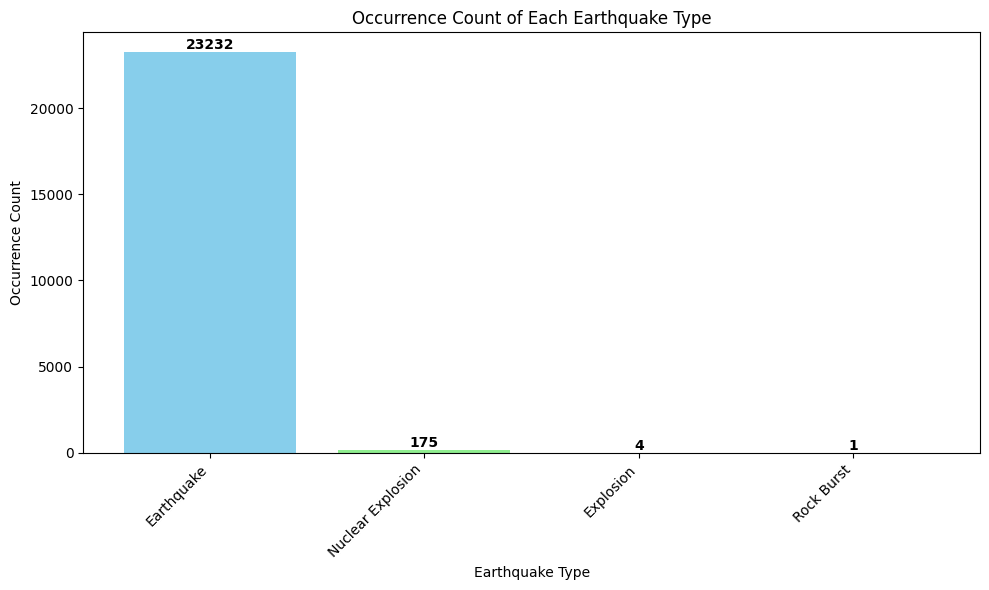

In [ ]:
# Bar Plot for Earthquake Types Occurrence
type_counts = data['Type'].value_counts()

plt.figure(figsize=(10, 6))
bar_colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']
plt.bar(type_counts.index, type_counts.values, color=bar_colors)

plt.xlabel('Earthquake Type')
plt.ylabel('Occurrence Count')
plt.title('Occurrence Count of Each Earthquake Type')

# Annotate each bar with its respective value
for i, v in enumerate(type_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* Earthquake Type Distribution: The majority of seismic events recorded in the dataset are classified as "Earthquake" with a count of 23,232 occurrences. Earthquakes are by far the most common type in the dataset, representing approximately 99.6% of all events.

* Rare Events: Other earthquake types, such as "Nuclear Explosion," "Explosion," and "Rock Burst," are relatively rare compared to earthquakes. "Nuclear Explosion" has 175 occurrences, making up around 0.75% of the dataset. "Explosion" has only 4 occurrences, and "Rock Burst" has just 1 occurrence, making them extremely rare in the dataset.

* Data Imbalance: The dataset is heavily imbalanced, with "Earthquake" dominating the records and the other earthquake types having significantly fewer occurrences. This imbalance may impact the performance of certain machine learning algorithms if classification tasks are involved.

### b. Distribution of Earthquake Depths

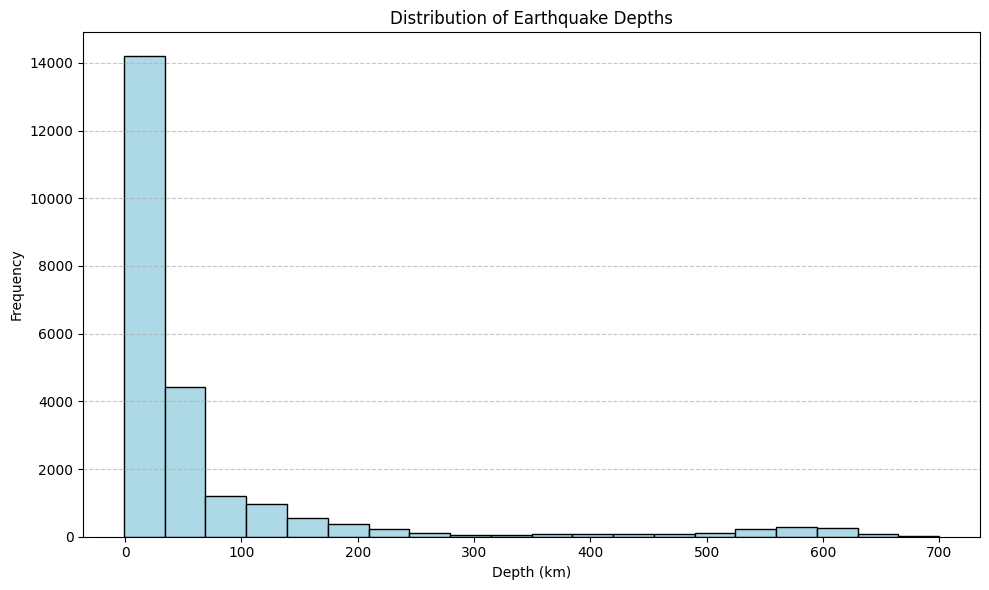

In [ ]:
# Histogram for Depth
plt.figure(figsize=(10, 6))
plt.hist(data['Depth'], bins=20, edgecolor='black', color='lightblue') # Added color for better visibility

plt.xlabel('Depth (km)')
plt.ylabel('Frequency')
plt.title('Distribution of Earthquake Depths')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

* Depth Distribution: The histogram shows the frequency distribution of earthquake depths in the dataset. The x-axis represents the depth in kilometers (km), and the y-axis represents the frequency or the number of earthquakes falling within each depth range.

* Common Depth Range: The majority of earthquakes in the dataset have depths between approximately 0 km to 100 km. This range shows the most frequent occurrences of seismic events.

* Shallow Earthquakes: The peak on the left side of the histogram indicates that shallow earthquakes (depths close to 0 km) are quite common. Shallow earthquakes are those that occur near the Earth's surface and can often have significant impacts on populated areas.

* Deep Earthquakes: The histogram shows a gradual decrease in frequency as the depth of earthquakes increases. This suggests that deep earthquakes (depths closer to 100 km) are less frequent compared to shallow earthquakes.

### c. Scatter Plot of Depth vs. Magnitude

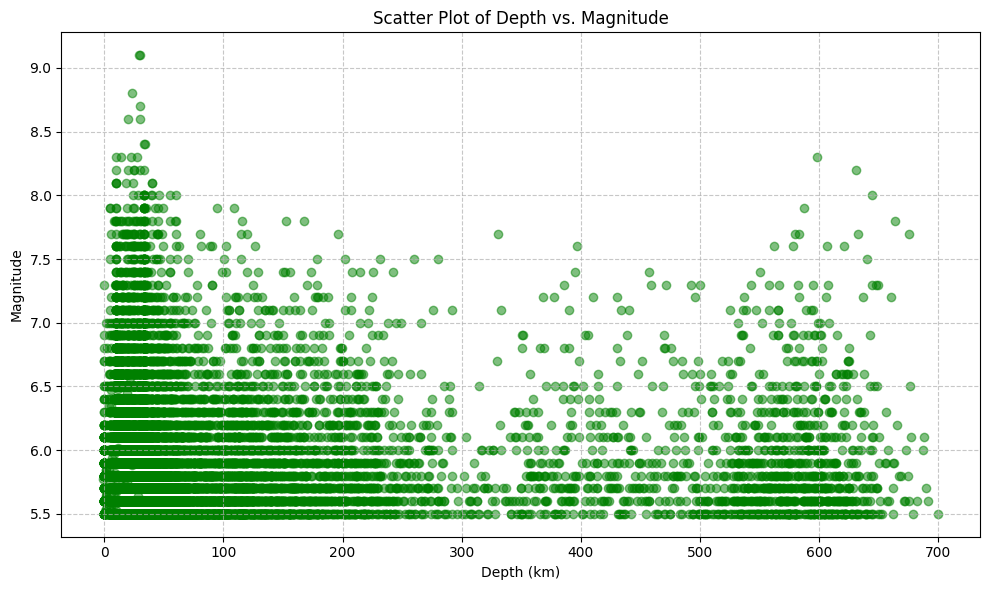

In [ ]:
# Scatter Plot for Depth vs. Magnitude
plt.figure(figsize=(10, 6))
plt.scatter(data['Depth'], data['Magnitude'], alpha=0.5, color='green') # Added color for better visibility

plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.title('Scatter Plot of Depth vs. Magnitude')

# Add grid lines for better readability
plt.grid(linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

* Magnitude-Depth Relationship: The scatter plot shows the relationship between earthquake depth and magnitude. Each point in the plot represents an individual earthquake event, with the x-axis representing the depth in kilometers (km) and the y-axis representing the magnitude.

* Magnitude Variation with Depth: The plot does not reveal a clear linear relationship between depth and magnitude. Instead, it shows that earthquakes with different magnitudes can occur at various depths.

* Depth-Magnitude Clusters: Clusters of data points at specific depths may indicate regions where earthquakes are more prevalent or may be associated with certain tectonic processes.

* Shallow and Deep Earthquakes: The plot contains earthquakes at both shallow depths (close to 0 km) and deep depths (towards the right end of the x-axis).

* Magnitude Distribution: The distribution of magnitudes provides insights into the frequency of different earthquake strengths within the dataset.

### d. Box Plot of Magnitude by Earthquake Type

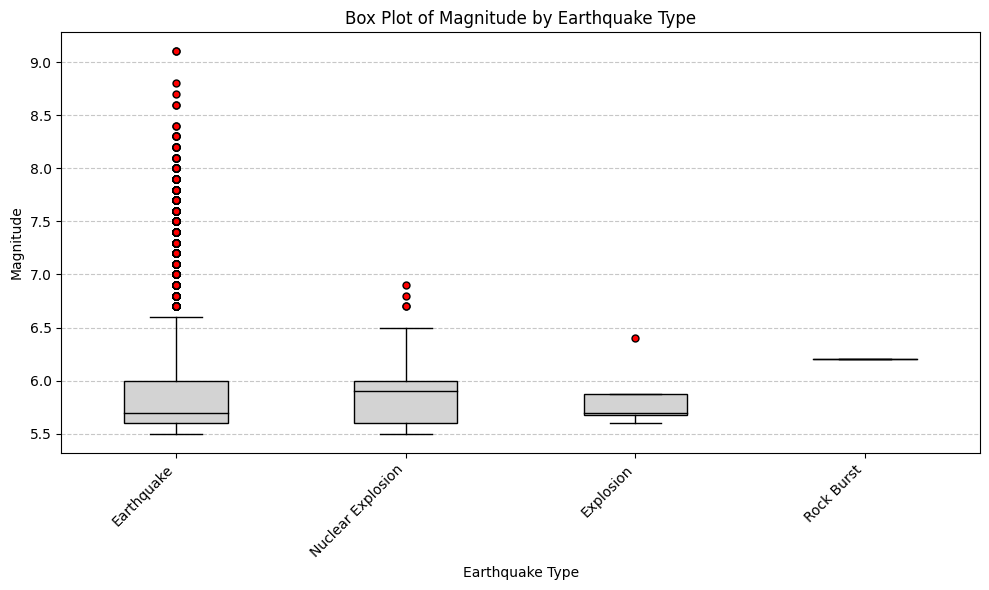

In [ ]:
# Box Plot for Magnitude vs. Type
plt.figure(figsize=(10, 6))

# Define colors for each box
boxplot_colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']

# Plot the box plot with specified colors
plt.boxplot([data[data['Type'] == t]['Magnitude'] for t in data['Type'].unique()],
            labels=data['Type'].unique(),
            patch_artist=True,  # Enable box filling
            boxprops=dict(facecolor='lightgray', color='black'),  # Box properties
            medianprops=dict(color='black'),  # Median line color
            whiskerprops=dict(color='black'),  # Whisker color
            capprops=dict(color='black'),  # Cap color
            flierprops=dict(marker='o', markerfacecolor='red', markersize=5))  # Outliers properties

plt.xlabel('Earthquake Type')
plt.ylabel('Magnitude')
plt.title('Box Plot of Magnitude by Earthquake Type')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* Magnitude Variation by Type: The box plot visually compares the distribution of earthquake magnitudes for different earthquake types. Each box represents the interquartile range (IQR) of magnitudes, while the median is indicated by the horizontal line inside each box.

* Earthquake Type Comparison: The box plot enables a quick comparison of the magnitude distributions among earthquake types, making it easy to identify any significant differences or similarities.

* Magnitude Range: The height (vertical size) of each box indicates the spread or range of magnitudes within each earthquake type. The larger the box, the greater the variation in magnitudes.

* Outliers: The circles (outliers) outside the boxes represent individual data points that fall significantly outside the typical magnitude range of their respective earthquake types.

* Typical Magnitudes: The position of the median (horizontal line inside each box) provides an idea of the typical magnitude value for each earthquake type.

## 5. Interactive Map of Earthquakes by Year

Visualizing Earthquake Occurrences in Different Years

In [ ]:
def create_map(year):
    # Filter data for the selected year
    filtered_data = data[data['Date'].str.contains(str(year))]

    # Create a Folium map centered at a specific location (e.g., latitude and longitude of a region)
    earthquake_map = folium.Map(location=[0, 0], zoom_start=2)

    # Add markers for each earthquake event in the selected year
    for index, row in filtered_data.iterrows():
        magnitude = row['Magnitude']
        depth = row['Depth']
        latitude = row['Latitude']
        longitude = row['Longitude']

        popup_text = f"Magnitude: {magnitude}, Depth: {depth} km"

        folium.Marker(
            location=[latitude, longitude],
            popup=popup_text,
            icon=folium.Icon(icon='cloud', color='red')
        ).add_to(earthquake_map)

    # Display the map
    return earthquake_map

# Create an interactive slider for selecting the year
year_slider = IntSlider(value=2000, min=1965, max=2023, step=1, description='Year:')

# Create an interactive map using the selected year
interactive_map = interact(create_map, year=year_slider)

# Display the interactive map
interactive_map

interactive(children=(IntSlider(value=2000, description='Year:', max=2023, min=1965), Output()), _dom_classes=…

<function __main__.create_map(year)>

* Temporal Distribution: The map allows us to observe the distribution of earthquakes over time. By sliding the year slider, we can explore how seismic activity varies from one year to another.

* Earthquake Hotspots: Certain regions on the map may exhibit more frequent earthquakes compared to others. These areas can be considered earthquake hotspots and may correspond to tectonic plate boundaries or regions with high geological activity.

* Historical Earthquakes: By selecting past years, we can identify significant historical earthquakes that have occurred in different regions. This can be useful for studying earthquake patterns and seismicity in specific time periods.

* Changes in Seismicity: The map allows us to observe any changes in seismicity over the years. For instance, we may notice an increase or decrease in earthquake occurrences in certain regions.

* Seismic Hazard Assessment: The interactive map can aid in seismic hazard assessment by providing a visual representation of earthquake events in different years. This information can be valuable for understanding the seismic risk of specific regions.

* Geological Insights: By analyzing earthquake patterns over time, researchers and seismologists can gain insights into the geological processes and tectonic activities in different regions.

* Magnitude and Depth Variability: The map displays earthquake markers with information on magnitude and depth. Analyzing this data across different years can reveal variations in earthquake magnitude and depth, leading to a better understanding of the seismic behavior in each region.